In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN,AffinityPropagation, KMeans
from sklearn.preprocessing import MinMaxScaler


In [ ]:
file_name = 'data-9722-2022-09-26'

In [ ]:
df = pd.read_csv('./'+file_name+'.csv', sep=';', encoding='cp1251', encoding_errors='ignore')
df = df.drop(columns=['ID', 'global_id'])
df

,EDU_NAME,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160
0,Государственное бюджетное общеобразовательное ...,2016-2017,Восточный административный округ,район Богородское,5,19
1,Государственное казенное общеобразовательное у...,2016-2017,Восточный административный округ,район Богородское,14,47
2,Государственное казенное общеобразовательное у...,2016-2017,Восточный административный округ,район Вешняки,0,1
3,Частное учреждение общеобразовательная организ...,2016-2017,Восточный административный округ,район Вешняки,0,6
4,Автономная некоммерческая организация средняя ...,2016-2017,Восточный административный округ,район Восточное Измайлово,1,5
...,...,...,...,...,...,...
3529,Государственное бюджетное общеобразовательное ...,2020-2021,Юго-Восточный административный округ,район Марьино,26,70
3530,Государственное бюджетное общеобразовательное ...,2020-2021,Юго-Западный административный округ,Академический район,142,199
3531,Государственное бюджетное общеобразовательное ...,2020-2021,Юго-Западный административный округ,Академический район,44,84
3532,Государственное бюджетное общеобразовательное ...,2020-2021,Юго-Западный административный округ,район Зюзино,19,33


In [ ]:
# функция  вместо minmaxscaler + чистка от выбросов
def df_year_clean(year):
  df_temp = df[df['YEAR'] == year]
  df_temp = df_temp.drop(df_temp[df_temp.PASSES_OVER_220>200].index)
  df_temp = df_temp.drop(df_temp[df_temp.PASSES_OVER_220<=0].index)
  df_temp = df_temp.drop(df_temp[df_temp.PASSER_UNDER_160>300].index)
  df_temp = df_temp.drop(df_temp[df_temp.PASSER_UNDER_160<=0].index)

  col_name = ['pass200_'+year[-1:], 'pass160_'+year[-1:]]
  df_temp[col_name[0]] = df_temp['PASSES_OVER_220']/(df_temp['PASSES_OVER_220'] + df_temp['PASSER_UNDER_160'])
  df_temp[col_name[1]] = df_temp['PASSER_UNDER_160']/(df_temp['PASSES_OVER_220'] + df_temp['PASSER_UNDER_160'])
  df_temp = df_temp.drop(columns=['PASSER_UNDER_160', 'PASSES_OVER_220'])
  # df.rename(columns={"A": "a", "B": "c"})

  # df16_17 = df16_17.drop(df16_17[df16_17[col_name[0]] == NaN].index)
  # df16_17 = df16_17.drop(df16_17[df16_17[col_name[1]] == NaN].index)
  return df_temp
  # df16_17.sort_values(by=[col_name[0]])

In [ ]:
# находим те школы, которые предоставили данные во все года 
s1 = pd.merge(df_year_clean('2016-2017'), df_year_clean('2017-2018'), how='inner', on=['EDU_NAME', 'AdmArea', 'District'])
s1 = pd.merge(s1, df_year_clean('2018-2019'), how='inner', on=['EDU_NAME', 'AdmArea', 'District'])
s1 = pd.merge(s1, df_year_clean('2019-2020'), how='inner', on=['EDU_NAME', 'AdmArea', 'District'])
s1 = pd.merge(s1, df_year_clean('2020-2021'), how='inner', on=['EDU_NAME', 'AdmArea', 'District'])

s1

<ipython-input-6-9d9003def8b2>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'YEAR_x'} in the result is deprecated and will raise a MergeError in a future version.
  s1 = pd.merge(s1, df_year_clean('2019-2020'), how='inner', on=['EDU_NAME', 'AdmArea', 'District'])


,EDU_NAME,YEAR_x,AdmArea,District,pass200_7,pass160_7,YEAR_y,pass200_8,pass160_8,YEAR_x,pass200_9,pass160_9,YEAR_y,pass200_0,pass160_0,YEAR,pass200_1,pass160_1
0,Государственное бюджетное общеобразовательное ...,2016-2017,Восточный административный округ,район Новогиреево,0.240000,0.760000,2017-2018,0.267857,0.732143,2018-2019,0.331081,0.668919,2019-2020,0.319149,0.680851,2020-2021,0.312000,0.688000
1,Государственное бюджетное общеобразовательное ...,2016-2017,Восточный административный округ,район Новогиреево,0.296296,0.703704,2017-2018,0.230769,0.769231,2018-2019,0.285714,0.714286,2019-2020,0.259615,0.740385,2020-2021,0.297297,0.702703
2,Государственное бюджетное общеобразовательное ...,2016-2017,Восточный административный округ,район Перово,0.272727,0.727273,2017-2018,0.343750,0.656250,2018-2019,0.302326,0.697674,2019-2020,0.147059,0.852941,2020-2021,0.333333,0.666667
3,Государственное бюджетное общеобразовательное ...,2016-2017,Восточный административный округ,район Соколиная Гора,0.304348,0.695652,2017-2018,0.262774,0.737226,2018-2019,0.232558,0.767442,2019-2020,0.319149,0.680851,2020-2021,0.291339,0.708661
4,Государственное бюджетное общеобразовательное ...,2016-2017,Западный административный округ,район Дорогомилово,0.255319,0.744681,2017-2018,0.365079,0.634921,2018-2019,0.275862,0.724138,2019-2020,0.361702,0.638298,2020-2021,0.352941,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Государственное бюджетное общеобразовательное ...,2016-2017,Южный административный округ,район Бирюлёво Восточное,0.277778,0.722222,2017-2018,0.214286,0.785714,2018-2019,0.215054,0.784946,2019-2020,0.307087,0.692913,2020-2021,0.322581,0.677419
461,Государственное бюджетное общеобразовательное ...,2016-2017,Южный административный округ,район Зябликово,0.363636,0.636364,2017-2018,0.382716,0.617284,2018-2019,0.393939,0.606061,2019-2020,0.330000,0.670000,2020-2021,0.367521,0.632479
462,Государственное бюджетное общеобразовательное ...,2016-2017,Южный административный округ,район Орехово-Борисово Южное,0.250000,0.750000,2017-2018,0.258065,0.741935,2018-2019,0.235294,0.764706,2019-2020,0.278351,0.721649,2020-2021,0.287879,0.712121
463,Государственное бюджетное общеобразовательное ...,2016-2017,Южный административный округ,район Царицыно,0.179487,0.820513,2017-2018,0.304878,0.695122,2018-2019,0.163265,0.836735,2019-2020,0.238095,0.761905,2020-2021,0.310811,0.689189


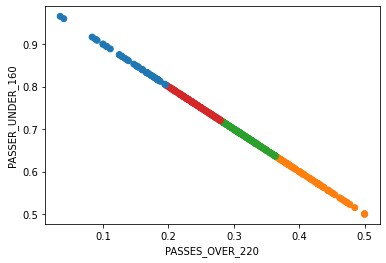

In [ ]:
# находим кластеры школ, для которых будем наблюдать динамику 
clusters_num = 4
model=KMeans(n_clusters=clusters_num)
l=model.fit_predict(s1[['pass200_7', 'pass160_7']])
k = 2
df2 = s1
df2['l'] = l

color_dict = matplotlib.rcParams["axes.prop_cycle"]
df2['color'] = [list(list(color_dict)[x].values())[0] for x in df2.l.tolist()]


plt.scatter(df2['pass200_7'],df2['pass160_7'], c = df2['color'])
# plt.plot(np.linspace(0,1,10),np.linspace(0,1/k,10)*k)
# plt.scatter(df2[df2.manufacturer == 'samsung']['text_sentiment'],df2[df2.manufacturer == 'samsung']['price_sentiment'], marker = 's', c = df2[df2.manufacturer == 'samsung']['l'])
plt.xlabel("PASSES_OVER_220")
plt.ylabel("PASSER_UNDER_160")
plt.show()
# print(model.n_clusters)
# df2


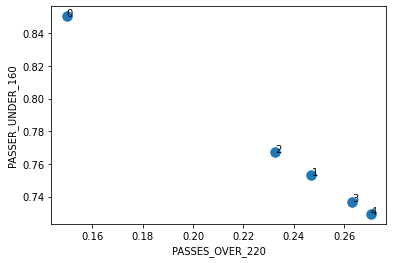

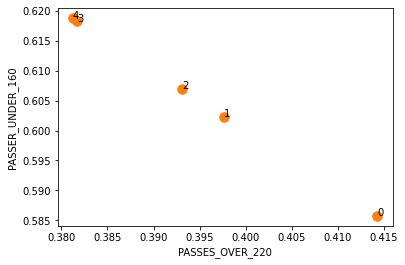

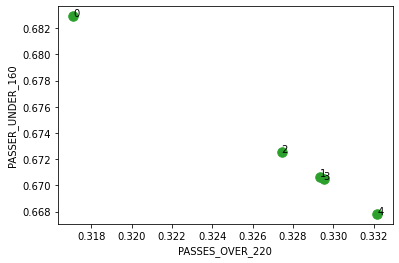

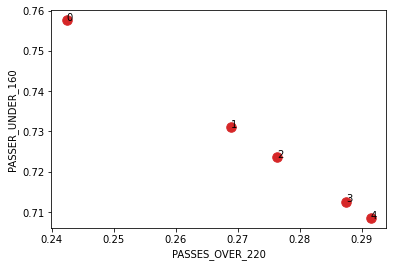

In [ ]:
size = 90

for num in range(clusters_num):
  # plt.figure(figsize=(14, 8))
  plt.scatter(df2.groupby('l').mean().iloc[num].tolist()[0::2], df2.groupby('l').mean().iloc[num].tolist()[1::2], c = list(list(color_dict)[num].values())[0], s = size)
  for i in range(5):
    plt.text(df2.groupby('l').mean().iloc[num].tolist()[0::2][i], df2.groupby('l').mean().iloc[num].tolist()[1::2][i], s=i)
  plt.xlabel("PASSES_OVER_220")
  plt.ylabel("PASSER_UNDER_160")
  plt.show()


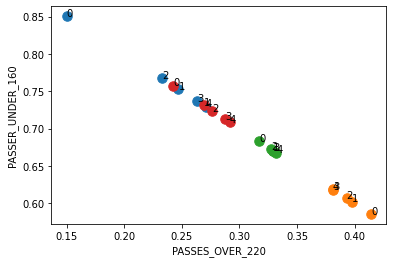

In [ ]:
size = 90
# plt.figure(figsize=(14, 8))

for num in range(clusters_num):
  plt.scatter(df2.groupby('l').mean().iloc[num].tolist()[0::2], df2.groupby('l').mean().iloc[num].tolist()[1::2], c = list(list(color_dict)[num].values())[0], s = size)
  for i in range(5):
    plt.text(df2.groupby('l').mean().iloc[num].tolist()[0::2][i], df2.groupby('l').mean().iloc[num].tolist()[1::2][i], s=i)
plt.xlabel("PASSES_OVER_220")
plt.ylabel("PASSER_UNDER_160")
plt.show()


In [ ]:
# далее идут ячейки для проверки

In [ ]:
model=AffinityPropagation()
l=model.fit_predict(scaler.inverse_transform(data))
fig,ax=plt.subplots(figsize=(18,5))
ax.scatter(scaler.inverse_transform(data)[:,0],scaler.inverse_transform(data)[:,1],c=l)

In [ ]:
year = '2016-2017'
year[-1:]

'7'

In [ ]:
model.cluster_centers_

array([[0.41804774, 0.58195226],
       [0.31724139, 0.68275861],
       [0.14312262, 0.85687738],
       [0.24060228, 0.75939772]])

In [ ]:
df2.groupby('l').mean().iloc[0].tolist()

[0.24208031437483826,
 0.7579196856251618,
 0.2682140056198386,
 0.7317859943801613,
 0.27609563561786754,
 0.7239043643821325,
 0.2870713060017816,
 0.7129286939982185,
 0.29130798393262824,
 0.7086920160673718]